In [99]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [100]:
# Load the dataset
data = pd.read_csv('Student_Marks.csv')
print(f'Data loaded on:   {datetime.datetime.now().strftime(format="%Y-%m-%d %H:%M:%S")}')

Data loaded on:   2025-06-05 15:48:34


In [101]:
data.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [102]:
data.shape

(100, 2)

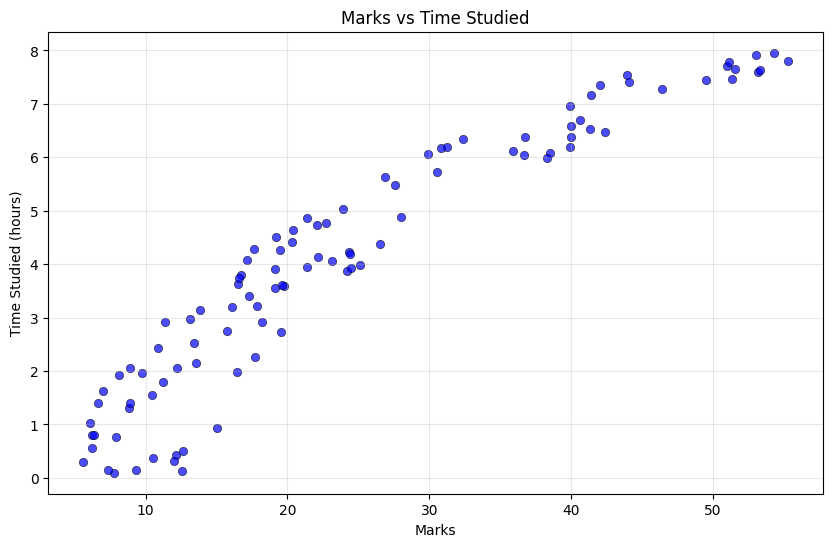

In [103]:
# Scatter plot: Marks vs Time Studied
plt.figure(figsize=(10, 6))
plt.scatter(data['Marks'], data['time_study'], alpha=0.7, color='blue', edgecolors='black', linewidth=0.5)
plt.title('Marks vs Time Studied')
plt.xlabel('Marks')
plt.ylabel('Time Studied (hours)')
plt.grid(True, alpha=0.3)
plt.show()

In [104]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [105]:
# Save the training and testing sets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [106]:
X = train_data[['time_study']]  # Feature 
y = train_data['Marks']         # Target 

model = SGDRegressor(max_iter=1000, alpha=0.01, random_state=42)
model.fit(X, y)


# Get coefficients from the Haskell model and the Python model
slope_hask = 5.658626141830167
intercept_hask = 0.9934681927519131

slope = model.coef_[0]
intercept = model.intercept_[0]


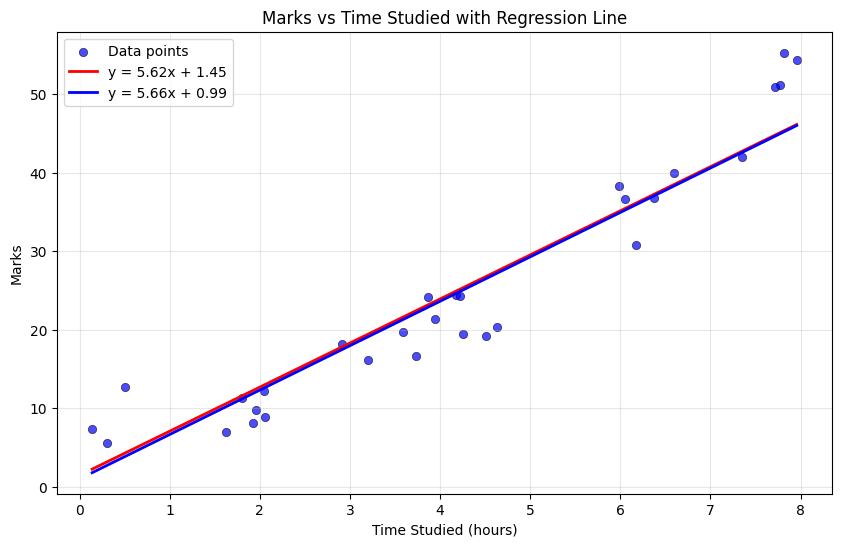

In [107]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(test_data['time_study'], test_data['Marks'], alpha=0.7, color='blue', edgecolors='black', linewidth=0.5, label='Data points')

# Plot regression lines
# Red line for Python model
# Blue line for Haskell model
x_range = np.linspace(test_data['time_study'].min(), test_data['time_study'].max(), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')

y_pred_hask = slope_hask * x_range + intercept_hask
plt.plot(x_range, y_pred_hask, color='blue', linewidth=2, label=f'y = {slope_hask:.2f}x + {intercept_hask:.2f}')

# Plot alter
plt.title('Marks vs Time Studied with Regression Line')
plt.xlabel('Time Studied (hours)')
plt.ylabel('Marks')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()